In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import copy
from types import SimpleNamespace
import warnings
warnings.filterwarnings('ignore')

In [2]:
fullData = pd.read_csv("Rtable_2.csv")
fullData.drop(columns=fullData.columns[0], axis=1, inplace=True)


In [3]:
fullData

,Dead,Sexo,Edad_a_os__actual_,dias_estancia,paso_uci,saturaciono_1,saturaciono_2,saturaciono_3,saturaciono_4,temperatura_1,...,San-Linfocitos_absVal,San-Linfocitos_Pct,San-Monocitos_absVal_pat,San-Monocitos_Pct_pat,San-Monocitos_absVal,San-Monocitos_Pct,San-Neutrófilos_absVal_pat,San-Neutrófilos_Pct_pat,San-Neutrófilos_absVal,San-Neutrófilos_Pct
0,True,0,86,5.0,0,94.2,95.3,96.0,93.3,37.1,...,0.70890,10.200000,1,0,0.89655,12.9,0,1,5.30980,76.400002
1,False,1,97,10.0,0,95.3,92.9,95.7,93.9,37.3,...,1.38050,27.500000,0,0,0.24090,10.9,0,1,3.23790,76.199997
2,True,1,94,3.0,0,69.7,43.0,40.0,50.9,35.0,...,0.75632,5.800000,1,0,1.03016,7.9,1,1,11.22744,86.099998
3,False,1,91,8.0,0,96.0,93.8,94.2,97.1,36.1,...,0.43320,14.400000,0,0,0.24255,7.0,0,1,6.00495,89.599998
4,False,0,90,8.0,0,95.6,95.5,94.2,94.7,36.6,...,0.39864,10.700000,0,1,0.54900,14.1,0,1,3.48357,79.300003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,False,1,50,3.0,0,95.0,95.3,95.3,94.5,37.0,...,1.18859,22.299999,0,0,0.28782,5.4,0,0,3.81095,71.500000
1453,False,1,34,3.0,0,98.0,97.0,97.5,97.0,37.2,...,1.18734,48.400002,0,0,0.21924,8.8,1,1,1.06092,44.200001
1454,False,1,63,7.0,0,96.0,96.8,95.4,95.6,36.8,...,1.33730,28.000000,0,0,0.14928,6.0,0,1,4.70854,76.900002
1455,False,1,32,1.0,0,98.5,98.0,97.0,98.0,36.3,...,1.29960,38.000000,0,0,0.21888,6.4,0,0,1.76130,51.500000


In [4]:
pac_vars = [
#     "Id_Paciente",
    "Dead",
    "Sexo",
    "Edad_a_os__actual_",
    "dias_estancia",
    "paso_uci"
]
time_vars = ['saturaciono_1', 'saturaciono_2', 'saturaciono_3', 'saturaciono_4',
       'temperatura_1', 'temperatura_2', 'temperatura_3', 'temperatura_4',
       'frecuenciac_1', 'frecuenciac_2', 'frecuenciac_3', 'frecuenciac_4',
       'sysPres_1', 'sysPres_2', 'sysPres_3', 'sysPres_4', 'diasPres_1',
       'diasPres_2', 'diasPres_3', 'diasPres_4'
]
ventilator_vars = ['tiposaturac_GafasO2_1',
       'tiposaturac_GafasO2_2', 'tiposaturac_GafasO2_3',
       'tiposaturac_GafasO2_4', 'tiposaturac_VMK_1', 'tiposaturac_VMK_2',
       'tiposaturac_VMK_3', 'tiposaturac_VMK_4', 'tiposaturac_Optiflow_1',
       'tiposaturac_Optiflow_2', 'tiposaturac_Optiflow_3',
       'tiposaturac_Optiflow_4'
]
blood_vars = ['San-Basófilos_absVal_pat',
       'San-Basófilos_Pct_pat', 'San-Basófilos_absVal',
       'San-Basófilos_Pct', 'San-Eosinófilos_absVal_pat',
       'San-Eosinófilos_Pct_pat', 'San-Eosinófilos_absVal',
       'San-Eosinófilos_Pct', 'San-Linfocitos_absVal_pat',
       'San-Linfocitos_Pct_pat', 'San-Linfocitos_absVal',
       'San-Linfocitos_Pct', 'San-Monocitos_absVal_pat',
       'San-Monocitos_Pct_pat', 'San-Monocitos_absVal',
       'San-Monocitos_Pct', 'San-Neutrófilos_absVal_pat',
       'San-Neutrófilos_Pct_pat', 'San-Neutrófilos_absVal',
       'San-Neutrófilos_Pct'
]

In [5]:
current_variables = pac_vars+time_vars+ventilator_vars
plugin=fullData[current_variables]
plugin

,Dead,Sexo,Edad_a_os__actual_,dias_estancia,paso_uci,saturaciono_1,saturaciono_2,saturaciono_3,saturaciono_4,temperatura_1,...,tiposaturac_GafasO2_3,tiposaturac_GafasO2_4,tiposaturac_VMK_1,tiposaturac_VMK_2,tiposaturac_VMK_3,tiposaturac_VMK_4,tiposaturac_Optiflow_1,tiposaturac_Optiflow_2,tiposaturac_Optiflow_3,tiposaturac_Optiflow_4
0,True,0,86,5.0,0,94.2,95.3,96.0,93.3,37.1,...,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,False,1,97,10.0,0,95.3,92.9,95.7,93.9,37.3,...,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2,True,1,94,3.0,0,69.7,43.0,40.0,50.9,35.0,...,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,False,1,91,8.0,0,96.0,93.8,94.2,97.1,36.1,...,0.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0
4,False,0,90,8.0,0,95.6,95.5,94.2,94.7,36.6,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,False,1,50,3.0,0,95.0,95.3,95.3,94.5,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1453,False,1,34,3.0,0,98.0,97.0,97.5,97.0,37.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1454,False,1,63,7.0,0,96.0,96.8,95.4,95.6,36.8,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1455,False,1,32,1.0,0,98.5,98.0,97.0,98.0,36.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Regressions

Since we're making binary predictions (Dead/Alive), we want to use classification methods, so things like SVMs, Gradient Boosting(XGBoost), KNNs, Random Forest and regular logistic regressions

We can also try our hand at hyperparameter tuning with each one of these, cross-validation stuff too

Another thing you have to keep in mind as you write these, by the way, is how vulnerable these algorithms are to collinearity, cuz your temporally related variables are going to be correlated within themselves, obviously

It would also be worth it to, when comparing, not only compare the accuracy and error type, but also the execution time, to compare performance cost. It won't be important when using it, but it will dictate how long it takes to update the model when it is.

Also, we dont need to calculate MSE or anything for now since we're only predicting whether they died or not, BUT, if instead we want to predict length of stay, we'd need to 

Is train-test split fine or should I try K-fold or some such stuff?

In [6]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

In [7]:
def runmodel(data,model,splitsize=0.2):
    X = data.drop(columns=["Dead"])
    y = data['Dead']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=splitsize)

    start= time.time() #training efficienty
    model.fit(X_train, y_train)
    end= time.time()
    fit_time = end - start

    start= time.time() #operational efficiency
    y_pred = model.predict(X_test)
    end= time.time()
    pred_time = end - start


    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred) #this is basically how accurate our death prediction SPECIFICALLY is, so it's important, its tp/(tp+fn)
    report = classification_report(y_test, y_pred)
    out = {"model": model,"predictions": y_pred,"accuracy": accuracy,
           "confusion": confusion,"report": report, "recall": recall,
           "fit_time": fit_time, "pred_time": pred_time}
    return SimpleNamespace(**out) #to convert it to an object so we can say out.accuracy instead of having to do out["accuracy"]

In [8]:
def pred_test(data,model,split=0.2,reps=50):
    acc_list = []
    rec_list = []
    Ftime_list = []
    Ptime_list = []
    for i in range(0,reps):
        # print(i/reps)
        temp = runmodel(data,model,splitsize=split)
        acc_list.append(temp.accuracy)
        rec_list.append(temp.recall)
        Ftime_list.append(temp.fit_time)
        Ptime_list.append(temp.pred_time)

    #get means and 95%CI for plotting later
    out = {"accuracy": np.average(acc_list),       "a95": 1.96 * (np.std(acc_list, ddof=1) / math.sqrt(len(acc_list))), 
           "recall": np.average(rec_list),         "r95": 1.96 * (np.std(rec_list, ddof=1) / math.sqrt(len(rec_list))),
           "fit_time": np.average(Ftime_list),     "f95": 1.96 * (np.std(Ftime_list, ddof=1) / math.sqrt(len(Ftime_list))),
           "pred_time": np.average(Ptime_list),    "p95": 1.96 * (np.std(Ptime_list, ddof=1) / math.sqrt(len(Ptime_list)))}
    # return SimpleNamespace(**out) #to convert it to an object so we can say out.accuracy instead of having to do out["accuracy"]
    return out   
        

In [9]:
plugin

,Dead,Sexo,Edad_a_os__actual_,dias_estancia,paso_uci,saturaciono_1,saturaciono_2,saturaciono_3,saturaciono_4,temperatura_1,...,tiposaturac_GafasO2_3,tiposaturac_GafasO2_4,tiposaturac_VMK_1,tiposaturac_VMK_2,tiposaturac_VMK_3,tiposaturac_VMK_4,tiposaturac_Optiflow_1,tiposaturac_Optiflow_2,tiposaturac_Optiflow_3,tiposaturac_Optiflow_4
0,True,0,86,5.0,0,94.2,95.3,96.0,93.3,37.1,...,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,False,1,97,10.0,0,95.3,92.9,95.7,93.9,37.3,...,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2,True,1,94,3.0,0,69.7,43.0,40.0,50.9,35.0,...,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,False,1,91,8.0,0,96.0,93.8,94.2,97.1,36.1,...,0.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0
4,False,0,90,8.0,0,95.6,95.5,94.2,94.7,36.6,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,False,1,50,3.0,0,95.0,95.3,95.3,94.5,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1453,False,1,34,3.0,0,98.0,97.0,97.5,97.0,37.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1454,False,1,63,7.0,0,96.0,96.8,95.4,95.6,36.8,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1455,False,1,32,1.0,0,98.5,98.0,97.0,98.0,36.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
Mlr = LogisticRegression()
lr = runmodel(plugin,Mlr)
lr.accuracy

0.9143835616438356

In [12]:
len(lr.predictions) #IT'S A SMALLER NUMBER CUZ UR USING A SUBSET, youre running a test set, jackass

292

In [13]:
pd.DataFrame(data=[plugin.drop(columns=["Dead"]).columns.values,lr.model.coef_[0]]).T

,0,1
0,Sexo,-0.084164
1,Edad_a_os__actual_,0.080903
2,dias_estancia,0.013702
3,paso_uci,0.02311
4,saturaciono_1,0.273147
5,saturaciono_2,-0.052426
6,saturaciono_3,-0.046051
7,saturaciono_4,-0.489627
8,temperatura_1,0.189179
9,temperatura_2,0.185868


In [14]:
lr_reps = pred_test(plugin,Mlr,reps=200)
lr_reps["accuracy"]

np.float64(0.9301198630136988)

Classification report probably important to us, since we know that the risk of erroneously tagging someone as not at death risk is greater than the risk of treating someone who would have been fine.

In [15]:
# sns.histplot(ctes_lin.ac_list)

It would also be good if we can check how the prediction performance changes as you remove the later entries, cuz after all, they won't have the last entries until it's too late in the real world

Also, ask her how to FRAME the report and analysis. Meaning, how to discuss coefficients, how to compare the models effectively etc

zamn, a 5% increase in accuracy from the version without respirator data, from 0.89 to 0.94

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
Mrf = RandomForestClassifier(max_depth=2, random_state=0)
rf = runmodel(plugin,Mrf)
rf.accuracy

0.9212328767123288

In [18]:
rf_reps = pred_test(plugin,Mrf,reps=200)
rf_reps["accuracy"]

np.float64(0.9132020547945205)

## KNN

I believe I read KNN likes to work with variables that are close together in size, which is not our case at all, so truthfully, it might be a bad fit for our specific situation.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
Mknn = KNeighborsClassifier(n_neighbors=3)
knn = runmodel(plugin,Mknn)
knn.accuracy

0.9075342465753424

In [21]:
knn_reps = pred_test(plugin,Mknn,reps=200)
knn_reps["accuracy"]

np.float64(0.8849486301369863)

## XGBoost

In [22]:
from xgboost import XGBClassifier

In [23]:
Mxgb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
xgb = runmodel(plugin,Mxgb)
xgb.accuracy

0.9417808219178082

In [24]:
xgb_reps = pred_test(plugin,Mxgb,reps=200)
xgb_reps["accuracy"]

np.float64(0.922208904109589)

## SVM Classifier

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [26]:
Msvm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm = runmodel(plugin,Msvm)
svm.accuracy

0.928082191780822

In [27]:
svm_reps = pred_test(plugin,Msvm,reps=200)
svm_reps["accuracy"]

np.float64(0.9352568493150685)

# Comparison Zone

We're comparing 3 things for each of these models:
- Overall Accuracy
- Type 2 Error (False Negatives)
- Computational Performance

We don't look at our Type 1 Error since the risk of erroneuosly marking somebody as living when they die is costlier than the inverse.
Additionally, since these'll be presented with error bars, I reckon we should generate a 95% confidence interval or a standard deviation for error bars (whichever is easier to produce, honestly...)

So, my theory design for a testfunction takes in a dataset, a list of models, and a number of reps, then tests them and compares the mean accuracy, type 2 error and computational performance, but that means pred_test() needs to return those 3 variables, not just accuracy

Ok, well, now pred_test() does all that, so let's nicely wrap it and give it some test runs!

In [28]:
def compare(data,models,modelnames,reps=200):
    out = []
    for i,model in enumerate(models):
        print(i/len(models))
        out.append(pred_test(data,model,reps=reps))


    return out
    # ax = sns.barplot(x=out.ac_mean, y=modelnames)
    # ax.bar_label(ax.containers[1])
    # plt.axis('off')
    # plt.show()


In [29]:
modellist = [
    LogisticRegression(), #Logistic Regression
    RandomForestClassifier(max_depth=2, random_state=0), #Random Forest
    KNeighborsClassifier(n_neighbors=3), #KNN
    XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'), #XGB
    make_pipeline(StandardScaler(), SVC(gamma='auto')) #SVM
]
namelist = [
    "LR",
    "RF",
    "KNN",
    "XGB",
    "SVC"
]

In [30]:
test = compare(plugin,modellist,namelist,reps=200)

0.0
0.2
0.4
0.6
0.8


In [31]:
# pd.DataFrame.from_records(test)
tbltest=pd.DataFrame(test)

In [32]:
def plotstats(stattbl,modelnames):
    #ACCURACY
    plt.bar(modelnames, stattbl.accuracy, yerr=stattbl.a95, capsize=10, color='darkgreen', edgecolor='black')
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy with 95% Confidence Interval Error Bars")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0.8,1)
    plt.tight_layout()
    plt.show()

    #RECALL
    plt.bar(modelnames, stattbl.recall, yerr=stattbl.r95, capsize=10, color='lightblue', edgecolor='black')
    plt.ylabel("Recall")
    plt.title("Model Recall with 95% Confidence Interval Error Bars")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    #FIT
    plt.bar(modelnames, stattbl.fit_time, yerr=stattbl.f95, capsize=10, color='orange', edgecolor='black')
    plt.ylabel("Fit Execution Time")
    plt.title("Model Fit Execution Time with 95% Confidence Interval Error Bars")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    #PRED
    plt.bar(modelnames, stattbl.pred_time, yerr=stattbl.p95, capsize=10, color='crimson', edgecolor='black')
    plt.ylabel("Prediction Execution Time")
    plt.title("Model Prediction Execution Time with 95% Confidence Interval Error Bars")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

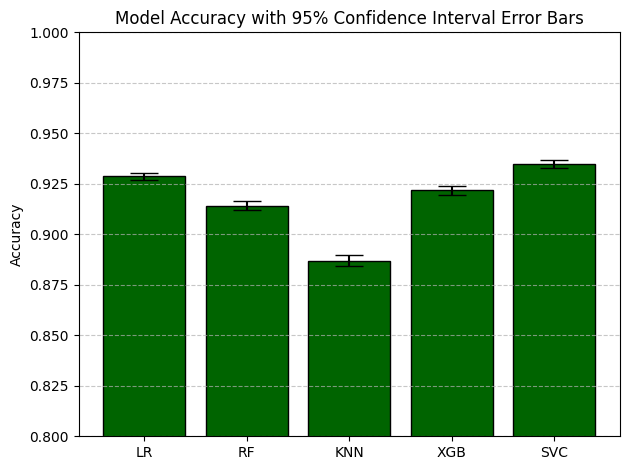

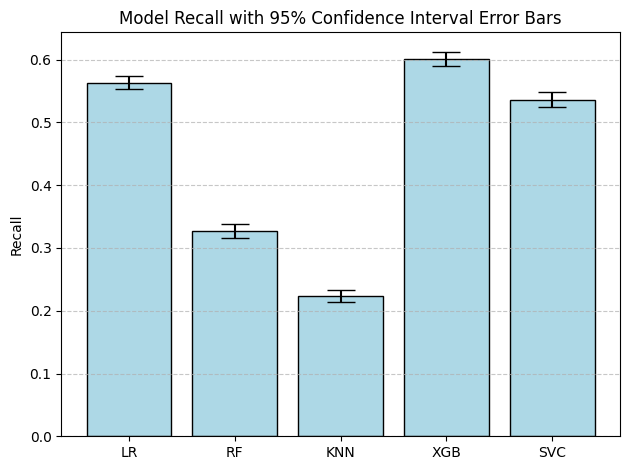

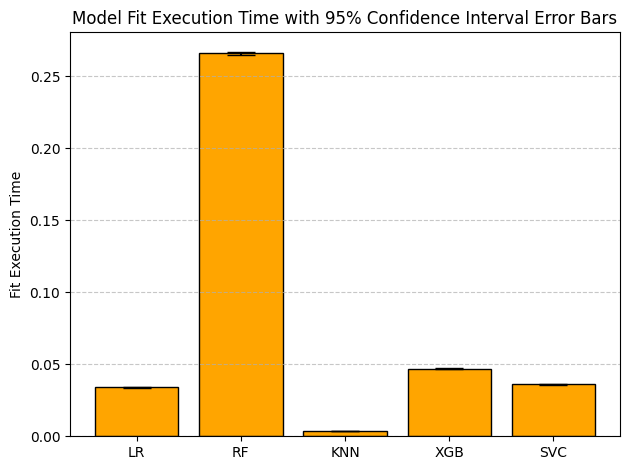

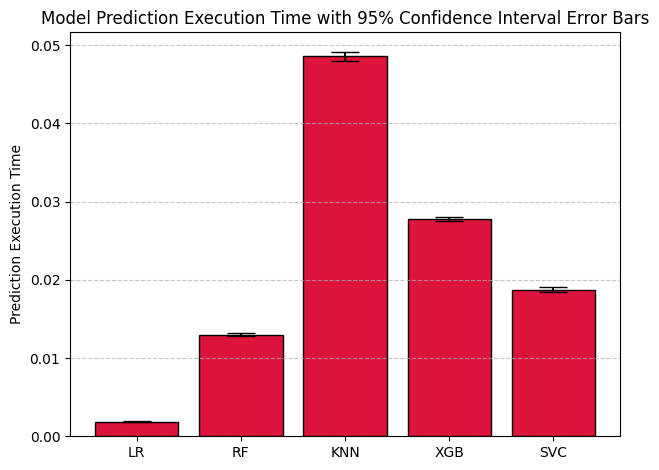

In [33]:
plotstats(tbltest,namelist)